# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [105]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import plotgenerator as pg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [106]:
from inauguralproject import ExchangeEconomyClass

optimale allokeringer 

In [107]:
edgeworth = ExchangeEconomyClass()

def edgeworth_box(N):
    # Initialize lists to store x1A, x2A, x1B, and x2B
    x1A = [i / N for i in range(N + 1)]
    x2A = [i / N for i in range(N + 1)]
    x1B = [1 - x for x in x1A]
    x2B = [1 - x for x in x2A]

    # Calculate utility for initial endowments
    uA_initial = edgeworth.utility_A(edgeworth.par.w1A, edgeworth.par.w2A)
    print('uA_initial', uA_initial)
    uB_initial = edgeworth.utility_B((1-edgeworth.par.w1A), (1-edgeworth.par.w2A))
    print('uB_initial', uB_initial)

    # Lists to store x1A_val and x2A_val when condition is satisfied
    x1A_opt_1 = []
    x2A_opt_1 = []

    # Iterate over all combinations of x1A and x2A
    for x1A_val in x1A:
        for x2A_val in x2A:
            # Calculate utility for current allocation
            uA_current = edgeworth.utility_A(x1A_val, x2A_val)
            uB_current = edgeworth.utility_B(1-x1A_val, 1-x2A_val)
            
            # Check if current utility is greater than or equal to initial utility
            if uA_current >= uA_initial and uB_current >= uB_initial:
                x1A_opt_1.append(x1A_val)
                x2A_opt_1.append(x2A_val)

    # Return the lists of efficient allocations
    return x1A_opt_1, x2A_opt_1

# Call the function with N value
x1A_opt_1, x2A_opt_1 = edgeworth_box(N=75)
#print("x1A_opt:", x1A_opt)
#print("x2A_opt:", x2A_opt)

uA_initial 0.41601676461038084
uB_initial 0.30365889718756617


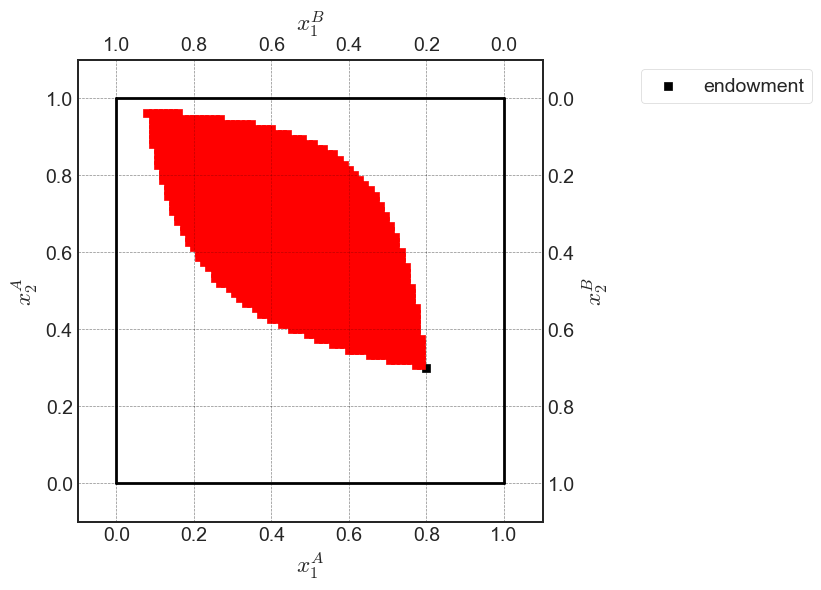

In [108]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(x1A_opt_1,x2A_opt_1,marker='s',color='red',label='endowment')

# Question 2

eps givet forskellige priser



In [109]:
clearing_market_error = ExchangeEconomyClass()

def error_clearing(N):
    # Initialize lists to store p1, eps1, and eps2
    p1_values = [0.5 + 2*(i / N) for i in range(N)]
    eps1_values = []
    eps2_values = []

    # Iterate over all combinations of p1
    for p1_val in p1_values:
        eps1, eps2 = clearing_market_error.check_market_clearing(p1_val)
        eps1_values.append(eps1)
        eps2_values.append(eps2)

    return p1_values, eps1_values, eps2_values

# Call the function with N value and capture the returned values
p1_values, eps1_values, eps2_values = error_clearing(N=75)

# Print the results
#for p1_val, eps1_val, eps2_val in zip(p1_values, eps1_values, eps2_values):
#    print(f"p1: {p1_val:5.3f}, eps1: {eps1_val:5.3f}, eps2: {eps2_val:5.3f}")

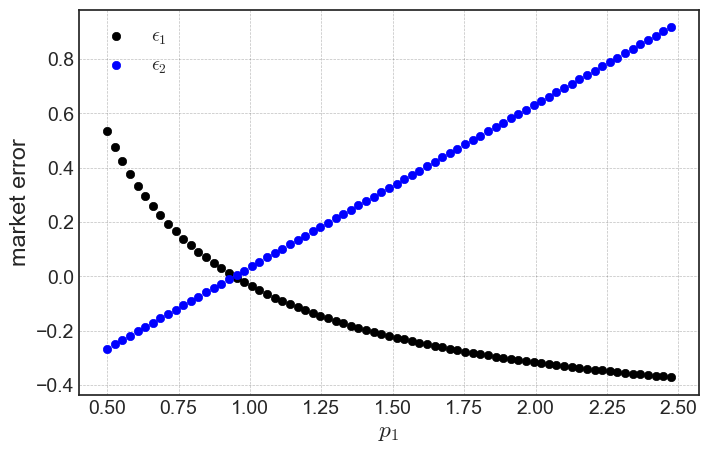

In [110]:
fig = pg.PlotFigure(figsize=(8,5),fontname=None)
fig.add_plot(x=p1_values,y=eps1_values,marker='o',color='black',label='$\epsilon_1$',xlabel=f"$p_1$",ylabel=f"market error")
fig.add_plot(x=p1_values,y=eps2_values,marker='o',color='blue',label='$\epsilon_2$',xlabel=f"$p_1$",ylabel=f"market error")
fig.add_legend()
fig.set_number_format('y','{x:,.1f}')
fig.show()

# Question 3

Explain your code and procedure

In [111]:
clear_market = ExchangeEconomyClass()

In [112]:
# code

clear_market = ExchangeEconomyClass()

p1_guess = 0.1    # 0.94444
clear_market.find_equilibrium(p1_guess)


  0: p1=  0.10000000 -> exess demand ->     5.06666667
  1: p1=  2.63333333 -> exess demand ->    -0.38481013
  2: p1=  2.44092827 -> exess demand ->    -0.36784788
  3: p1=  2.25700433 -> exess demand ->    -0.34892974
  4: p1=  2.08253946 -> exess demand ->    -0.32789631
     ...
 25: p1=  0.94634325 -> exess demand ->    -0.00120388
 50: p1=  0.94444458 -> exess demand ->    -0.00000009
 56: p1=  0.94444446 -> exess demand ->    -0.00000001


In [113]:
clear_market.print_solution()


solution to market equilibrium:
p1 = 0.944
p2 = 1
excess demand are:
z1 = -8.650000049570394e-09
z2= 8.169444454253494e-09


In [114]:
x1a_3, x2a_3 = clear_market.demand_A(0.944)
x1b_3, x2_b_3 = clear_market.demand_B(0.944)

ADD CONCISE CONLUSION.

# Question 4

**a** 

In [115]:
clear_market.find_best_choice_test(N=75)
x1_best,x2_best,u_best,p1 = clear_market.find_best_choice_test(N=75)

x1A_4a = x1_best
x2A_4a = x2_best

print('The optimal price of A:', clear_market.find_best_choice_test(N=75)[3])
print('The allocation becomes: x1a=', x1_best,'x2a =', x2_best, 'and A´s utility becomes:', u_best)

The optimal price of A: 1.8866666666666667
The allocation becomes: x1a= 0.619316843345112 x2a = 0.6408888888888888 and A´s utility becomes: 0.633615985237553


**b**

In [116]:
x1A, x2A, uA, optimal_p1 = clear_market.find_best_choice_any_price()

x1A_4b = x1A
x2A_4b = x2A

print(f"Optimal price p1: {optimal_p1}")
print(f"Optimal allocations for A: x1A = {x1A}, x2A = {x2A}")
print(f"Utility of A: {uA}")

Optimal price p1: 1.8993460108783902
Optimal allocations for A: x1A = 0.6209680609392946, x2A = 0.6400435992747739
Utility of A: 0.6336208506936586


# Question 5

**a** 

In [117]:
clear_market.opgave_5_A()

u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_A()

x1A_5a = x1A_opt
x2A_5a = x2A_opt

print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 

u_A_opt: 0.7415523509091093
the optimal x1A for A is: 0.56
the optimal x2A for A is: 0.8533333333333334


**b**

In [118]:
u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_B_solver()

x1A_5b = x1A_opt
x2A_5b = x2A_opt

print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt)

u_A_opt: 0.7432276079008587
the optimal x1A for A is: 0.575745097505377
the optimal x2A for A is: 0.8444377230608446


# Question 6

**a** 

In [119]:
clear_market.opgave_6_A()

x1A_opt, x2A_opt = clear_market.opgave_6_A()
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 

the optimal x1A for A is: 0.33326665333066613
the optimal x2A for A is: 0.6665333066613323


**B** 

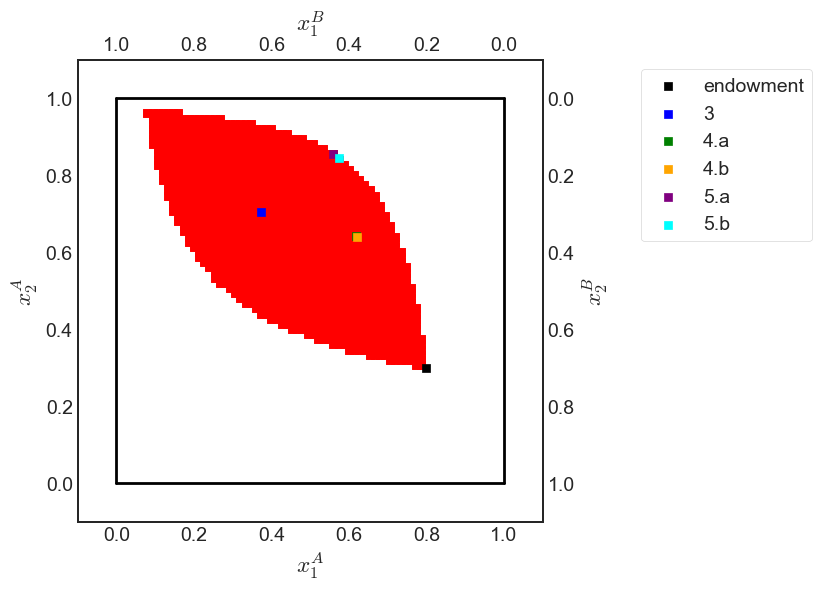

In [120]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(x1A_opt_1, x2A_opt_1, marker='s', color='red', zorder=1)

# Plot other scatter plots with higher zorder (they will appear above 'endowment')
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment', zorder=2)
ax_A.scatter(x1a_3, x2a_3, marker='s', color='blue', label='3', zorder=3)
ax_A.scatter(x1A_4a, x2A_4a, marker='s', color='green', label='4.a', zorder=4)
ax_A.scatter(x1A_4b, x2A_4b, marker='s', color='orange', label='4.b', zorder=5)
ax_A.scatter(x1A_5a, x2A_5a, marker='s', color='purple', label='5.a', zorder=6)
ax_A.scatter(x1A_5b, x2A_5b, marker='s', color='cyan', label='5.b', zorder=7)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(x1A_opt_1,x2A_opt_1,marker='s',color='red',label='endowment')

# Question 7

**a** 

In [121]:
import random

# Define the number of draws
num_draws = 50

# Initialize lists to store the values of w1A and w2A
w1A_values = []
w2A_values = []

# Draw values for w1A and w2A and store them in the lists
for _ in range(num_draws):
    w1A_values.append(random.uniform(0, 1))
    w2A_values.append(random.uniform(0, 1))

print(w1A_values)
print(w2A_values)
# Define the list of vectors W
W_values = [(w1A_values[i], w2A_values[i]) for i in range(num_draws)]

# Print the list of vectors W
#print("W values:")
#for i, W in enumerate(W_values):
#    print(f"W[{i+1}] =", W)

[0.020369721516291683, 0.9135584676810834, 0.8055133931295864, 0.15850207029713093, 0.5584485596866327, 0.4376493816362578, 0.3048993317258013, 0.4402065495733892, 0.4830776917320537, 0.9243009577621997, 0.1159413184441116, 0.9348999794054887, 0.4252695409817344, 0.29095329538193593, 0.871685653674438, 0.11538106508211166, 0.9299399113635889, 0.5764881282618362, 0.1823379945097673, 0.9567922443872352, 0.4804449773122116, 0.2968230240001196, 0.8991506824139367, 0.91644256729887, 0.7215530662580255, 0.6112062056586314, 0.8420855840579112, 0.1050614048767805, 0.9227695632327034, 0.31432602422247213, 0.006914130150592057, 0.14017097585838112, 0.15637196136828146, 0.09279981953658245, 0.3960243771497166, 0.8946280977454779, 0.8392373593333663, 0.9950593721631803, 0.48054362794173133, 0.15727001645495342, 0.7453965821632585, 0.561972597720012, 0.9567959619412689, 0.4900892225490513, 0.62111644819534, 0.8870029783860093, 0.12696342348045186, 0.8821748534705144, 0.6615842267388337, 0.573736603

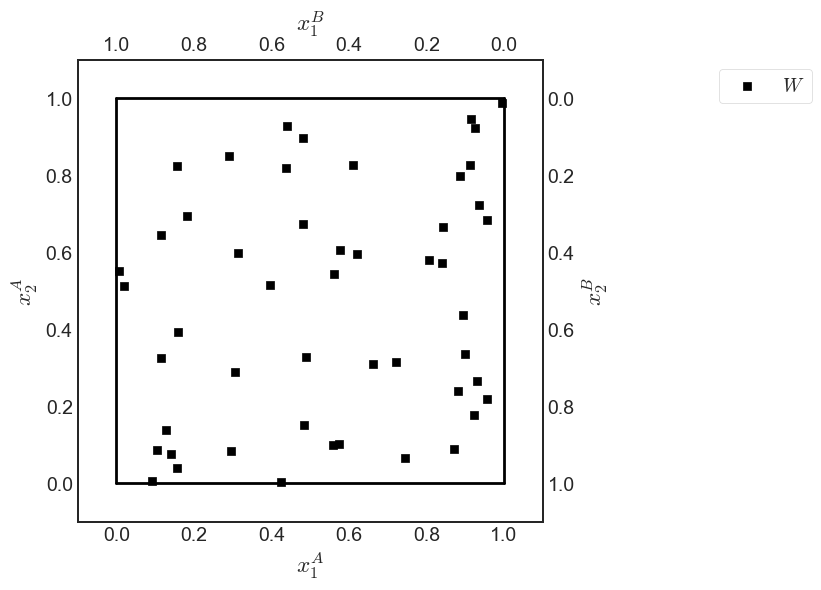

In [122]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot other scatter plots with higher zorder (they will appear above 'endowment')
ax_A.scatter(w1A_values, w2A_values, marker='s', color='black', label='$W$', zorder=2)


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


# Question 8

**a** 

In [123]:
# code

clear_market = ExchangeEconomyClass()

p1_guess = 0.1    # 0.94444
clear_market.find_equilibrium_8(p1_guess)

AttributeError: 'ExchangeEconomyClass' object has no attribute 'find_equilibrium_8'

In [ ]:
clear_market.print_solution_8()

In [ ]:
import inauguralproject_opg_7

In [ ]:
from inauguralproject_opg_7 import ExchangeEconomyClass_opg_7

In [ ]:
opgave_7 = ExchangeEconomyClass_opg_7()

p1_guess = 0.01    # 0.94444
opgave_7.find_equilibrium_test_1(p1_guess)

In [ ]:
opgave_7.print_solution()